**PROBLEM STATEMENT**

To predict the prices of cars by the different companies using the available data

In [1]:
#importing the neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('cars (1).csv')


In [3]:
df

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.20,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.50,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.20,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.80,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.60,Nigerian Used,"125,206"
...,...,...,...,...,...,...,...,...,...
7200,VHL14329,Abuja,Honda,Civic,"2,018",Gray,5.70,Foreign Used,"65,000"
7201,VHL10637,Abuja,BMW,X3,"2,007",White,4.00,Nigerian Used,"200,000"
7202,VHL19734,Abuja,Toyota,RAV4 2.5 Limited 4x4,"2,010",Black,2.85,Nigerian Used,NaN
7203,VHL15569,Lagos,Mercedes-Benz,GLK-Class 350,"2,012",Black,8.65,Foreign Used,"85,750"


**DATA CLEANING**

In [4]:
#Data cleaning
df['Year'] = df.Year.str.replace(',','')

In [5]:
df.head(3)

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011,Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,2012,Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,2010,Red,9.2,Foreign Used,"110,852"


In [6]:
#View to know the datatype. What is the difference between object, float and integer? How do you know which is supposed to be which?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7184 non-null   object 
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    7008 non-null   object 
 8   Distance                4845 non-null   object 
dtypes: float64(1), object(8)
memory usage: 506.7+ KB


In [7]:
#checking for and handling missing values. Small missing datasets can be dropped or filled with mean, median or mode in categorical data.
df.isna().sum()

VehicleID                    0
Location                     0
Maker                        0
Model                        0
Year                        21
Colour                       0
Amount (Million Naira)      17
Type                       197
Distance                  2360
dtype: int64

In [8]:
#Filling the missing data(year and amount) with the median
df['Year'].fillna((df['Year'].median()),inplace=True)
df['Amount (Million Naira)'].fillna((df['Amount (Million Naira)'].median()),inplace=True)
df['Type'].fillna(method ='ffill',inplace=True)
df['Distance'] = df.Distance.str.replace(',','')
df['Distance'].fillna((df['Distance'].median()),inplace=True)

In [9]:
#Recheck for missing values
df.isna().sum()

VehicleID                 0
Location                  0
Maker                     0
Model                     0
Year                      0
Colour                    0
Amount (Million Naira)    0
Type                      0
Distance                  0
dtype: int64

In [10]:
#Converting from objects to float(decimal numbers)
df['Distance'] = df.Distance.astype(float)
df['Year'] = df.Year.astype(int)

In [11]:
#To reconfirm that its in order
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7205 non-null   int32  
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7205 non-null   float64
 7   Type                    7205 non-null   object 
 8   Distance                7205 non-null   float64
dtypes: float64(2), int32(1), object(6)
memory usage: 478.6+ KB


In [12]:
#Modelling. Dropping axis that will not be useful in modelling. Axis 0 rep rows; Axis 1 rep columns.
df.drop(['VehicleID', 'Location'], axis = 1, inplace=True)

In [13]:
df.head()

,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,Honda,Accord Coupe EX V-6,2011,Silver,2.2,Nigerian Used,80830.0
1,Hyundai,Sonata,2012,Silver,3.5,Nigerian Used,125000.0
2,Lexus,RX 350,2010,Red,9.2,Foreign Used,110852.0
3,Mercedes-Benz,GLE-Class,2017,Blue,22.8,Foreign Used,30000.0
4,Toyota,Highlander,2002,Red,2.6,Nigerian Used,125206.0


**MODELLING**

When you are working with a machine learning model, you convert everything in the dataframe to numbers. **Label encoder** converts categorical data to numerical data e.g. 1, 2, 3, 4. etc.
**One Hot Encoder** converts between the range of 0 - 1.

In [14]:
#To encode the dataset
categ_col = df.select_dtypes (include=['object','category']).columns
num_col = [col for col in df.columns if col not in categ_col]
print(categ_col)

Index(['Maker', 'Model', 'Colour', 'Type'], dtype='object')


In [15]:
print(num_col)

['Year', 'Amount (Million Naira)', 'Distance']


In [16]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categ_col:
    df[i] = le.fit_transform(df[i])

In [17]:
#If it is not in numbers, it will be an error.
df.head()

,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,17,117,2011,16,2.2,2,80830.0
1,19,1049,2012,16,3.5,2,125000.0
2,29,908,2010,15,9.2,1,110852.0
3,34,508,2017,2,22.8,1,30000.0
4,52,569,2002,15,2.6,2,125206.0


In [18]:
pip install catboost


Note: you may need to restart the kernel to use updated packages.


In [19]:
#Model build, division into train-test split, metrics.
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error


In [20]:
#Splitting the data into X and Y. Amount(y) which will be the target or independent variable and the others will be the (x)
x = df.drop('Amount (Million Naira)', axis = 1)
y = df['Amount (Million Naira)']

In [21]:
#Splitting the data into train and test sets
#Calling it...same no of samples with random state.
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [22]:
#Putting models in a dictionary
models = {'Randomforest':RandomForestRegressor(),
         'Catboost':CatBoostRegressor(),
         'Gradientboost':GradientBoostingRegressor(),
         'Linearregression':LinearRegression()}

#Write a function to help to call the models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    
    #making a dictionary to keep model scores
    model_scores = {}
    
    #looping through the models
    for name, model in models.items():
        model.fit(x_train,y_train)
        model_scores[name] = model.score(x_test,y_test)
    return model_scores

In [23]:
%%time
scores = fit_and_score(models=models,
                      x_train = x_train,
                      x_test = x_test,
                      y_train = y_train,
                      y_test = y_test)
scores


Learning rate set to 0.053998
0:	learn: 24.3548574	total: 139ms	remaining: 2m 19s
1:	learn: 23.7273094	total: 142ms	remaining: 1m 11s
2:	learn: 23.1702016	total: 146ms	remaining: 48.5s
3:	learn: 22.5998034	total: 149ms	remaining: 37.1s
4:	learn: 22.0729039	total: 153ms	remaining: 30.3s
5:	learn: 21.5896351	total: 156ms	remaining: 25.8s
6:	learn: 21.1578760	total: 159ms	remaining: 22.6s
7:	learn: 20.7036019	total: 162ms	remaining: 20.1s
8:	learn: 20.3297402	total: 166ms	remaining: 18.3s
9:	learn: 19.9634334	total: 170ms	remaining: 16.9s
10:	learn: 19.5988025	total: 174ms	remaining: 15.6s
11:	learn: 19.2914077	total: 179ms	remaining: 14.8s
12:	learn: 18.9788321	total: 184ms	remaining: 14s
13:	learn: 18.6773854	total: 188ms	remaining: 13.3s
14:	learn: 18.4066661	total: 191ms	remaining: 12.6s
15:	learn: 18.1689555	total: 195ms	remaining: 12s
16:	learn: 17.8991048	total: 198ms	remaining: 11.5s
17:	learn: 17.6464212	total: 202ms	remaining: 11s
18:	learn: 17.4180626	total: 205ms	remaining: 10

193:	learn: 9.1393244	total: 839ms	remaining: 3.49s
194:	learn: 9.1170260	total: 845ms	remaining: 3.49s
195:	learn: 9.0955610	total: 852ms	remaining: 3.49s
196:	learn: 9.0798825	total: 858ms	remaining: 3.5s
197:	learn: 9.0651851	total: 864ms	remaining: 3.5s
198:	learn: 9.0475056	total: 868ms	remaining: 3.49s
199:	learn: 9.0363696	total: 874ms	remaining: 3.49s
200:	learn: 9.0139988	total: 906ms	remaining: 3.6s
201:	learn: 9.0051609	total: 911ms	remaining: 3.6s
202:	learn: 8.9845368	total: 914ms	remaining: 3.59s
203:	learn: 8.9710512	total: 918ms	remaining: 3.58s
204:	learn: 8.9626163	total: 924ms	remaining: 3.58s
205:	learn: 8.9508943	total: 927ms	remaining: 3.57s
206:	learn: 8.9404195	total: 932ms	remaining: 3.57s
207:	learn: 8.9199709	total: 936ms	remaining: 3.56s
208:	learn: 8.9106551	total: 939ms	remaining: 3.55s
209:	learn: 8.8978774	total: 943ms	remaining: 3.54s
210:	learn: 8.8748492	total: 946ms	remaining: 3.54s
211:	learn: 8.8601942	total: 949ms	remaining: 3.53s
212:	learn: 8.84

354:	learn: 7.2949346	total: 1.51s	remaining: 2.74s
355:	learn: 7.2885620	total: 1.51s	remaining: 2.74s
356:	learn: 7.2762293	total: 1.52s	remaining: 2.73s
357:	learn: 7.2708827	total: 1.52s	remaining: 2.73s
358:	learn: 7.2653510	total: 1.52s	remaining: 2.72s
359:	learn: 7.2616750	total: 1.53s	remaining: 2.72s
360:	learn: 7.2581980	total: 1.53s	remaining: 2.71s
361:	learn: 7.2549079	total: 1.54s	remaining: 2.71s
362:	learn: 7.2475775	total: 1.54s	remaining: 2.7s
363:	learn: 7.2431126	total: 1.54s	remaining: 2.7s
364:	learn: 7.2327494	total: 1.55s	remaining: 2.69s
365:	learn: 7.2275192	total: 1.55s	remaining: 2.69s
366:	learn: 7.2232154	total: 1.55s	remaining: 2.68s
367:	learn: 7.2124530	total: 1.56s	remaining: 2.68s
368:	learn: 7.2107952	total: 1.56s	remaining: 2.67s
369:	learn: 7.2064743	total: 1.57s	remaining: 2.67s
370:	learn: 7.1976906	total: 1.57s	remaining: 2.66s
371:	learn: 7.1949790	total: 1.58s	remaining: 2.66s
372:	learn: 7.1921530	total: 1.58s	remaining: 2.66s
373:	learn: 7.

523:	learn: 6.0778129	total: 2.19s	remaining: 1.99s
524:	learn: 6.0711939	total: 2.2s	remaining: 1.99s
525:	learn: 6.0681435	total: 2.2s	remaining: 1.99s
526:	learn: 6.0642759	total: 2.21s	remaining: 1.98s
527:	learn: 6.0604484	total: 2.21s	remaining: 1.98s
528:	learn: 6.0540706	total: 2.21s	remaining: 1.97s
529:	learn: 6.0514630	total: 2.22s	remaining: 1.97s
530:	learn: 6.0443846	total: 2.22s	remaining: 1.96s
531:	learn: 6.0374757	total: 2.23s	remaining: 1.96s
532:	learn: 6.0346963	total: 2.23s	remaining: 1.95s
533:	learn: 6.0250328	total: 2.24s	remaining: 1.96s
534:	learn: 6.0221343	total: 2.25s	remaining: 1.95s
535:	learn: 6.0194954	total: 2.25s	remaining: 1.95s
536:	learn: 6.0164954	total: 2.25s	remaining: 1.94s
537:	learn: 6.0146399	total: 2.26s	remaining: 1.94s
538:	learn: 6.0122283	total: 2.27s	remaining: 1.94s
539:	learn: 6.0075809	total: 2.27s	remaining: 1.93s
540:	learn: 6.0061759	total: 2.27s	remaining: 1.93s
541:	learn: 6.0021298	total: 2.28s	remaining: 1.92s
542:	learn: 6.

710:	learn: 5.2339041	total: 2.87s	remaining: 1.17s
711:	learn: 5.2303616	total: 2.87s	remaining: 1.16s
712:	learn: 5.2282586	total: 2.87s	remaining: 1.16s
713:	learn: 5.2232437	total: 2.88s	remaining: 1.15s
714:	learn: 5.2199134	total: 2.88s	remaining: 1.15s
715:	learn: 5.2186946	total: 2.88s	remaining: 1.14s
716:	learn: 5.2115591	total: 2.89s	remaining: 1.14s
717:	learn: 5.2099474	total: 2.89s	remaining: 1.14s
718:	learn: 5.2050802	total: 2.9s	remaining: 1.13s
719:	learn: 5.2003722	total: 2.9s	remaining: 1.13s
720:	learn: 5.1970394	total: 2.91s	remaining: 1.13s
721:	learn: 5.1933175	total: 2.91s	remaining: 1.12s
722:	learn: 5.1872044	total: 2.92s	remaining: 1.12s
723:	learn: 5.1812584	total: 2.92s	remaining: 1.11s
724:	learn: 5.1780501	total: 2.92s	remaining: 1.11s
725:	learn: 5.1772081	total: 2.93s	remaining: 1.1s
726:	learn: 5.1719144	total: 2.93s	remaining: 1.1s
727:	learn: 5.1672564	total: 2.94s	remaining: 1.1s
728:	learn: 5.1657252	total: 2.94s	remaining: 1.09s
729:	learn: 5.159

871:	learn: 4.6579417	total: 3.54s	remaining: 520ms
872:	learn: 4.6545007	total: 3.55s	remaining: 516ms
873:	learn: 4.6522593	total: 3.55s	remaining: 512ms
874:	learn: 4.6471281	total: 3.56s	remaining: 508ms
875:	learn: 4.6438247	total: 3.56s	remaining: 504ms
876:	learn: 4.6408876	total: 3.57s	remaining: 500ms
877:	learn: 4.6377045	total: 3.57s	remaining: 496ms
878:	learn: 4.6355134	total: 3.57s	remaining: 492ms
879:	learn: 4.6321401	total: 3.58s	remaining: 488ms
880:	learn: 4.6300206	total: 3.58s	remaining: 484ms
881:	learn: 4.6235741	total: 3.58s	remaining: 480ms
882:	learn: 4.6215311	total: 3.59s	remaining: 475ms
883:	learn: 4.6195624	total: 3.59s	remaining: 471ms
884:	learn: 4.6177176	total: 3.59s	remaining: 467ms
885:	learn: 4.6131346	total: 3.6s	remaining: 463ms
886:	learn: 4.6101658	total: 3.6s	remaining: 459ms
887:	learn: 4.6067756	total: 3.6s	remaining: 455ms
888:	learn: 4.6027532	total: 3.61s	remaining: 450ms
889:	learn: 4.5997076	total: 3.61s	remaining: 446ms
890:	learn: 4.5

{'Randomforest': 0.8162250910942752,
 'Catboost': 0.89425726778697,
 'Gradientboost': 0.8531185729407293,
 'Linearregression': 0.2212079668411353}

**NOTE**

The best model is CatBoost with 0.89; Also in Regression Algorithm, the default scoring metric in model building is r2. It is accuracy in classification.

Hyper-parameter tuning is to improve a model's performance. 

In [24]:
#Calling CatBoost again
cbt = CatBoostRegressor()
cbt.fit(x_train,y_train)

Learning rate set to 0.053998
0:	learn: 24.3548574	total: 5.45ms	remaining: 5.44s
1:	learn: 23.7273094	total: 10.4ms	remaining: 5.21s
2:	learn: 23.1702016	total: 15.7ms	remaining: 5.23s
3:	learn: 22.5998034	total: 21ms	remaining: 5.23s
4:	learn: 22.0729039	total: 26.3ms	remaining: 5.22s
5:	learn: 21.5896351	total: 31.1ms	remaining: 5.16s
6:	learn: 21.1578760	total: 49.6ms	remaining: 7.04s
7:	learn: 20.7036019	total: 53.2ms	remaining: 6.6s
8:	learn: 20.3297402	total: 56.5ms	remaining: 6.22s
9:	learn: 19.9634334	total: 59.8ms	remaining: 5.92s
10:	learn: 19.5988025	total: 63ms	remaining: 5.67s
11:	learn: 19.2914077	total: 66.2ms	remaining: 5.45s
12:	learn: 18.9788321	total: 69.5ms	remaining: 5.28s
13:	learn: 18.6773854	total: 72.7ms	remaining: 5.12s
14:	learn: 18.4066661	total: 76ms	remaining: 4.99s
15:	learn: 18.1689555	total: 79.4ms	remaining: 4.88s
16:	learn: 17.8991048	total: 82.6ms	remaining: 4.78s
17:	learn: 17.6464212	total: 85.9ms	remaining: 4.69s
18:	learn: 17.4180626	total: 89.1

171:	learn: 9.5584268	total: 664ms	remaining: 3.2s
172:	learn: 9.5407765	total: 668ms	remaining: 3.19s
173:	learn: 9.5197013	total: 672ms	remaining: 3.19s
174:	learn: 9.4944099	total: 676ms	remaining: 3.19s
175:	learn: 9.4779389	total: 680ms	remaining: 3.18s
176:	learn: 9.4615233	total: 684ms	remaining: 3.18s
177:	learn: 9.4398225	total: 690ms	remaining: 3.19s
178:	learn: 9.4203641	total: 694ms	remaining: 3.18s
179:	learn: 9.3921438	total: 698ms	remaining: 3.18s
180:	learn: 9.3835080	total: 701ms	remaining: 3.17s
181:	learn: 9.3722130	total: 704ms	remaining: 3.17s
182:	learn: 9.3493034	total: 708ms	remaining: 3.16s
183:	learn: 9.3358807	total: 713ms	remaining: 3.16s
184:	learn: 9.3251063	total: 716ms	remaining: 3.15s
185:	learn: 9.3043092	total: 720ms	remaining: 3.15s
186:	learn: 9.2777756	total: 723ms	remaining: 3.14s
187:	learn: 9.2595144	total: 726ms	remaining: 3.14s
188:	learn: 9.2372871	total: 730ms	remaining: 3.13s
189:	learn: 9.2131158	total: 734ms	remaining: 3.13s
190:	learn: 9

339:	learn: 7.4309967	total: 1.33s	remaining: 2.59s
340:	learn: 7.4212537	total: 1.34s	remaining: 2.59s
341:	learn: 7.4162625	total: 1.34s	remaining: 2.58s
342:	learn: 7.4083848	total: 1.34s	remaining: 2.58s
343:	learn: 7.4019214	total: 1.35s	remaining: 2.57s
344:	learn: 7.3898085	total: 1.35s	remaining: 2.57s
345:	learn: 7.3839298	total: 1.36s	remaining: 2.57s
346:	learn: 7.3624036	total: 1.36s	remaining: 2.56s
347:	learn: 7.3580359	total: 1.36s	remaining: 2.56s
348:	learn: 7.3533229	total: 1.37s	remaining: 2.55s
349:	learn: 7.3489941	total: 1.37s	remaining: 2.55s
350:	learn: 7.3447928	total: 1.37s	remaining: 2.54s
351:	learn: 7.3234120	total: 1.38s	remaining: 2.54s
352:	learn: 7.3193198	total: 1.38s	remaining: 2.53s
353:	learn: 7.2989207	total: 1.39s	remaining: 2.53s
354:	learn: 7.2949346	total: 1.39s	remaining: 2.52s
355:	learn: 7.2885620	total: 1.39s	remaining: 2.52s
356:	learn: 7.2762293	total: 1.39s	remaining: 2.51s
357:	learn: 7.2708827	total: 1.4s	remaining: 2.51s
358:	learn: 7

526:	learn: 6.0642759	total: 2.01s	remaining: 1.8s
527:	learn: 6.0604484	total: 2.02s	remaining: 1.8s
528:	learn: 6.0540706	total: 2.02s	remaining: 1.8s
529:	learn: 6.0514630	total: 2.02s	remaining: 1.79s
530:	learn: 6.0443846	total: 2.03s	remaining: 1.79s
531:	learn: 6.0374757	total: 2.03s	remaining: 1.79s
532:	learn: 6.0346963	total: 2.03s	remaining: 1.78s
533:	learn: 6.0250328	total: 2.05s	remaining: 1.79s
534:	learn: 6.0221343	total: 2.05s	remaining: 1.78s
535:	learn: 6.0194954	total: 2.07s	remaining: 1.79s
536:	learn: 6.0164954	total: 2.07s	remaining: 1.79s
537:	learn: 6.0146399	total: 2.08s	remaining: 1.78s
538:	learn: 6.0122283	total: 2.08s	remaining: 1.78s
539:	learn: 6.0075809	total: 2.09s	remaining: 1.78s
540:	learn: 6.0061759	total: 2.09s	remaining: 1.78s
541:	learn: 6.0021298	total: 2.1s	remaining: 1.77s
542:	learn: 6.0003627	total: 2.1s	remaining: 1.77s
543:	learn: 5.9886023	total: 2.11s	remaining: 1.77s
544:	learn: 5.9792994	total: 2.12s	remaining: 1.77s
545:	learn: 5.971

710:	learn: 5.2339041	total: 2.68s	remaining: 1.09s
711:	learn: 5.2303616	total: 2.68s	remaining: 1.08s
712:	learn: 5.2282586	total: 2.69s	remaining: 1.08s
713:	learn: 5.2232437	total: 2.69s	remaining: 1.08s
714:	learn: 5.2199134	total: 2.69s	remaining: 1.07s
715:	learn: 5.2186946	total: 2.7s	remaining: 1.07s
716:	learn: 5.2115591	total: 2.7s	remaining: 1.07s
717:	learn: 5.2099474	total: 2.71s	remaining: 1.06s
718:	learn: 5.2050802	total: 2.71s	remaining: 1.06s
719:	learn: 5.2003722	total: 2.71s	remaining: 1.05s
720:	learn: 5.1970394	total: 2.72s	remaining: 1.05s
721:	learn: 5.1933175	total: 2.72s	remaining: 1.05s
722:	learn: 5.1872044	total: 2.72s	remaining: 1.04s
723:	learn: 5.1812584	total: 2.73s	remaining: 1.04s
724:	learn: 5.1780501	total: 2.73s	remaining: 1.04s
725:	learn: 5.1772081	total: 2.73s	remaining: 1.03s
726:	learn: 5.1719144	total: 2.74s	remaining: 1.03s
727:	learn: 5.1672564	total: 2.74s	remaining: 1.02s
728:	learn: 5.1657252	total: 2.74s	remaining: 1.02s
729:	learn: 5.

909:	learn: 4.5339346	total: 3.36s	remaining: 332ms
910:	learn: 4.5295926	total: 3.36s	remaining: 328ms
911:	learn: 4.5250962	total: 3.36s	remaining: 325ms
912:	learn: 4.5212965	total: 3.37s	remaining: 321ms
913:	learn: 4.5186813	total: 3.37s	remaining: 317ms
914:	learn: 4.5161762	total: 3.38s	remaining: 314ms
915:	learn: 4.5146137	total: 3.38s	remaining: 310ms
916:	learn: 4.5119616	total: 3.38s	remaining: 306ms
917:	learn: 4.5104589	total: 3.39s	remaining: 303ms
918:	learn: 4.5052835	total: 3.39s	remaining: 299ms
919:	learn: 4.5026856	total: 3.39s	remaining: 295ms
920:	learn: 4.5000887	total: 3.4s	remaining: 291ms
921:	learn: 4.4963651	total: 3.4s	remaining: 288ms
922:	learn: 4.4933577	total: 3.4s	remaining: 284ms
923:	learn: 4.4918359	total: 3.41s	remaining: 280ms
924:	learn: 4.4890526	total: 3.41s	remaining: 276ms
925:	learn: 4.4876051	total: 3.41s	remaining: 273ms
926:	learn: 4.4841168	total: 3.42s	remaining: 269ms
927:	learn: 4.4820347	total: 3.42s	remaining: 265ms
928:	learn: 4.4

In [25]:
cbt.score(x_test,y_test) #R2 squared by default which can be from negative infinity to 1.The average sq. diff btw pred. & act. values

0.89425726778697

In [27]:
#Making predictions and analyse using the metrics to see if its good or not
y_preds = cbt.predict(x_test)
y_preds

array([ 8.14612526, 11.61828667, 50.46700965, ...,  1.73783662,
        8.81311366,  4.69141303])

In [28]:
#Use the metrics to see if the model is working well
#MAE is the average of the absolute differences between predictions and actual values.Gives you idea of how wrong your pred. are
mae = mean_absolute_error(y_test,y_preds)
mae
#This means that our model prediction is 2.91 units away from the actual value.

2.9119757137643303

In [29]:
df2 = pd.DataFrame(data ={'actual values':y_test,
                         'predictions':y_preds})
df2

,actual values,predictions
3252,6.50,8.146125
1535,16.00,11.618287
6337,56.00,50.467010
177,2.59,3.434963
230,25.00,23.514944
...,...,...
5230,18.00,27.183761
6476,7.40,7.112217
4949,2.00,1.737837
1886,3.90,8.813114


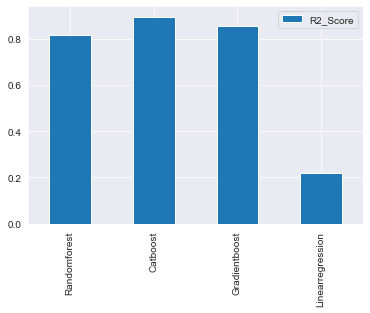

In [30]:
#The dataset will help you to choose what type of regression to use.
#Comparing the models
Compare = pd.DataFrame(scores, index = ['R2_Score'])
Compare.T.plot.bar();